# TensorFlow Basic Neural Network 
# with Higher-level TF Wrappers (Estimators, Layers)

Replicated from [Aymeric Damien's TF `neural_network` Example](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/neural_network.ipynb)

Basic multi-layer perceptron neural network, with TensorFlow's higher-level wrappers.

### Load packages and MNIST data set

Note that we're useing `one_hot=`**`False`**  here.

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Hyper parameters for learning

In [10]:
learning_rate = 0.1
num_steps = 5000
batch_size = 128
display_step = 1000

In [11]:
n_hidden_1 = 256  # number of neurons
n_hidden_2 = 256
num_input = 28**2
num_classes = 10

### TF input functions

The job of an input function is to deliver data (as numpy array or pandas dataframe) to a neural network.

In [13]:
input_func = tf.estimator.inputs.numpy_input_fn(
    x = {'images': mnist.train.images},
    y = mnist.train.labels,
    batch_size = batch_size,
    num_epochs = None,
    shuffle = True
)

The neural network is essentially a chain of operations.

In [14]:
def neural_net(x_dict):
    x = x_dict['images']
    layer_1 = tf.layers.dense(inputs=x, units=n_hidden_1)
    layer_2 = tf.layers.dense(inputs=layer_1, units=n_hidden_2)
    out_layer = tf.layers.dense(inputs=layer_2, units=num_classes)
    return out_layer

***What the hell is an `EstimatorSpec`???***

In [15]:
def model_fn(features, labels, mode):
    
    logits = neural_net(features)
    
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas  = tf.nn.softmax(logits=logits)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=pred_classes)
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, 
                                                                            labels=tf.cast(labels, dtype=tf.int32)))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    estim_specs = tf.estimator.EstimatorSpec(mode=mode, 
                                             predictions=pred_classes,
                                             loss=loss_op,
                                             train_op=train_op,
                                             eval_metric_ops = {'accuracy': acc_op}
                                            )
    return estim_specs

In [16]:
model = tf.estimator.Estimator(model_fn=model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/n_/yc8w5lvd0939ndnjzj5wm8mr0000gn/T/tmpqqujfk0w', '_keep_checkpoint_max': 5, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600}


In [17]:
model.train(input_fn=input_func, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/n_/yc8w5lvd0939ndnjzj5wm8mr0000gn/T/tmpqqujfk0w/model.ckpt.
INFO:tensorflow:loss = 2.32305, step = 1
INFO:tensorflow:global_step/sec: 154.395
INFO:tensorflow:loss = 0.541347, step = 101 (0.649 sec)
INFO:tensorflow:global_step/sec: 159.446
INFO:tensorflow:loss = 0.371348, step = 201 (0.627 sec)
INFO:tensorflow:global_step/sec: 160.697
INFO:tensorflow:loss = 0.298337, step = 301 (0.622 sec)
INFO:tensorflow:global_step/sec: 157.507
INFO:tensorflow:loss = 0.201261, step = 401 (0.635 sec)
INFO:tensorflow:global_step/sec: 165.896
INFO:tensorflow:loss = 0.385448, step = 501 (0.602 sec)
INFO:tensorflow:global_step/sec: 161.023
INFO:tensorflow:loss = 0.456829, step = 601 (0.621 sec)
INFO:tensorflow:global_step/sec: 164.316
INFO:tensorflow:loss = 0.216312, step = 701 (0.609 sec)
INFO:tensorflow:global_step/sec: 158.474
INFO:tensorflow:loss = 0.45164, step = 801 (0.631 sec)
INFO:tensorflow:globa

In [18]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': mnist.test.images},
                                                   y = mnist.test.labels,
                                                   batch_size=batch_size,
                                                   shuffle=False
                                                  )

In [19]:
model.evaluate(eval_input_fn)

INFO:tensorflow:Starting evaluation at 2017-12-26-05:53:05
INFO:tensorflow:Restoring parameters from /var/folders/n_/yc8w5lvd0939ndnjzj5wm8mr0000gn/T/tmpqqujfk0w/model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2017-12-26-05:53:05
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9223, global_step = 5000, loss = 0.279789


{'accuracy': 0.92229998, 'global_step': 5000, 'loss': 0.27978891}

In [36]:
n_images = 3
pick = np.random.randint(mnist.test.labels.shape[0], size=n_images)

test_images = np.array([mnist.test.images[i] for i in pick])

In [37]:
pred_input_func = tf.estimator.inputs.numpy_input_fn(x={'images': test_images}, shuffle=False)

preds = list(model.predict(input_fn=pred_input_func))

INFO:tensorflow:Restoring parameters from /var/folders/n_/yc8w5lvd0939ndnjzj5wm8mr0000gn/T/tmpqqujfk0w/model.ckpt-5000


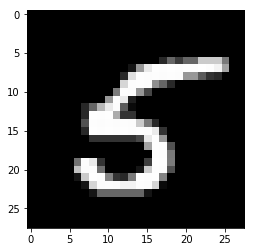

Model prediction: 5


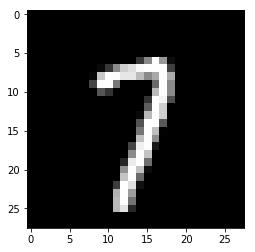

Model prediction: 7


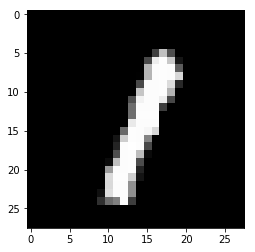

Model prediction: 1


In [38]:
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28,28]), cmap='gray')
    plt.show()
    print('Model prediction:', preds[i])